# **Problem Description -**

# What is a Corporate Credit Rating?
A corporate credit rating is an opinion of an independent agency regarding the likelihood that a corporation will fully meet its financial obligations(meet the terms of a contract) as they come due. A company’s corporate credit rating indicates its relative ability to pay its creditors. It is important to keep in mind that corporate credit ratings are an opinion, not a fact.

**Key Takeaways:**

-Corporate credit ratings are the assessment of a company's ability to pay its debts according to an independent credit rating agency.

-The three biggest credit rating agencies are: Standard and Poor's (S&P), Moody's, and Fitch.

-Corporate credit rating trends, over time, may allow an investor to compare the credit-worthiness of competing corporations.

For example, Standard & Poor’s uses "AAA" for the highest credit quality with the lowest credit risk, "AA" for the next best, followed by "A," then "BBB" for satisfactory credit.





# Data pre-processing -

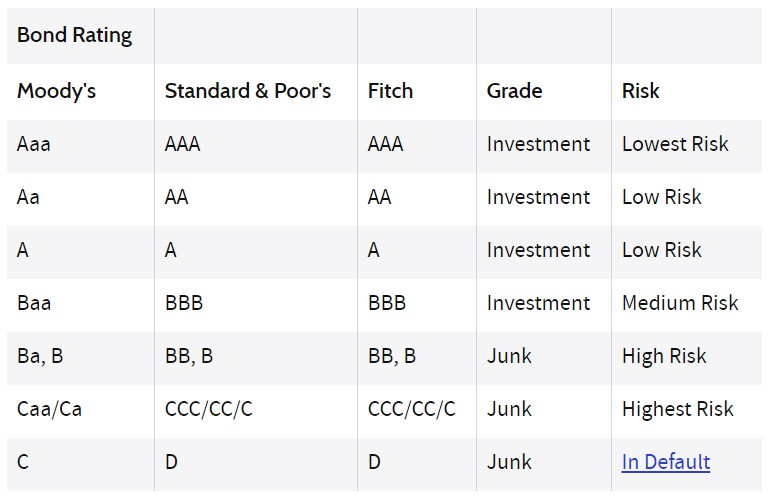

**Description of the Data -**

The ratings data set is an anonymized data set with corporate ratings where the ratings have been numerically encoded (1 = AAA, and so on). It has the following attributes:

**Spid**: ID number
*   *type - Nominal*

**Rating** : given rating (target atrribute)
*   *Type - Ordinal*
*   *Range - 1 to 10*


**COMMEQTA** *(Common equity to total assets)* : 
Common equity is the amount that all common shareholders have invested in a company
*   *Type - Ratio scaled Numeric , continuous*



	
**LLPLOANS** *(Loan loss provision to total loans)* :
A loan loss provision is an income statement expense set aside to allow for uncollected loans and loan payments
*   *Type - Ratio scaled Numeric , continuous*


**COSTTOINCOME** *(Operating costs to operating income)*: Operating costs are the ongoing expenses incurred from the normal 
day-to-day of running a business.
*   *Type - Ratio scaled Numeric , continuous*




**ROE** *(Return on equity)*: Return on equity (ROE) is a measure of financial performance calculated by dividing net income by shareholders' equity. Because shareholders' equity is equal to a company’s assets minus its debt.
ROE is considered a measure of a corporation's profitability in relation to stockholders’ equity.
*   *Type - Ratio scaled Numeric , continuous*



**LIQASSTA** *(Liquid assets to total assets)* : 
A liquid asset is something you own that can quickly and simply be   converted into cash while retaining its market value.
*   *Type - Ratio scaled Numeric , continuous*


**SIZE***(Natural logarithm of total assets)*
*   *Type - Ratio scaled Numeric , continuous*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/shivamkv/IME672A-project-/main/ratings.csv'
df = pd.read_csv(url)
data=df
df

,spid,rating,COMMEQTA,LLPLOANS,COSTTOINCOME,ROE,LIQASSTA,SIZE
0,106123,1,0.088714,0.003164,0.770227,0.053153,0.074674,19.1963
1,127999,1,0.024999,0.001708,0.228830,0.113123,0.789314,18.2826
2,129587,1,0.069544,0.000581,0.610047,0.110693,0.327376,17.9989
3,103135,2,0.018007,0.000000,0.449240,0.226650,0.451114,17.0716
4,360720,2,0.099826,-0.001657,0.728610,0.109520,0.023865,15.5385
...,...,...,...,...,...,...,...,...
192,109111,9,0.082444,0.017412,0.841883,-0.054473,0.094946,16.6953
193,316244,9,0.117238,0.003048,0.573840,0.128923,0.232619,16.3578
194,306139,9,0.109637,0.011144,0.557163,0.258600,0.133325,17.2891
195,319509,9,0.083465,0.012954,0.567193,0.075187,0.147710,16.0620


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   spid          197 non-null    int64  
 1   rating        197 non-null    int64  
 2   COMMEQTA      197 non-null    float64
 3   LLPLOANS      197 non-null    float64
 4   COSTTOINCOME  197 non-null    float64
 5   ROE           197 non-null    float64
 6   LIQASSTA      197 non-null    float64
 7   SIZE          197 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 12.4 KB


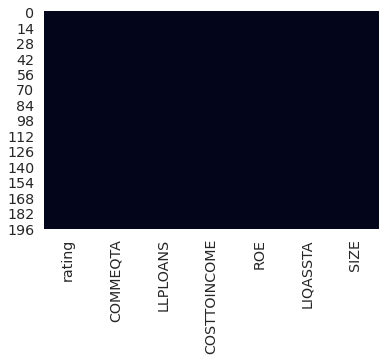

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.drop(['spid'],axis = 1,inplace = True)
df.describe()

,rating,COMMEQTA,LLPLOANS,COSTTOINCOME,ROE,LIQASSTA,SIZE
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,5.659898,0.070712,0.007719,0.632218,0.088387,0.194026,18.086384
std,1.876565,0.048087,0.012266,0.219139,0.111833,0.164494,1.617172
min,1.000000,0.007084,-0.001657,0.046550,-0.497617,0.006516,10.592200
25%,4.000000,0.035467,0.001591,0.532553,0.052493,0.061451,17.049200
50%,6.000000,0.059207,0.004449,0.615247,0.103680,0.139233,17.998900
75%,7.000000,0.094054,0.007843,0.697547,0.149610,0.280219,19.174500
max,10.000000,0.317565,0.095091,2.471780,0.501147,0.816648,21.434700


In [ ]:
df.isnull().sum()

rating          0
COMMEQTA        0
LLPLOANS        0
COSTTOINCOME    0
ROE             0
LIQASSTA        0
SIZE            0
dtype: int64

In [ ]:
df.rating.value_counts()

6     49
5     37
4     32
7     23
8     18
3     14
9     12
2      5
10     4
1      3
Name: rating, dtype: int64

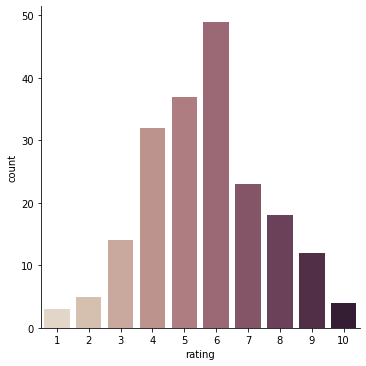

In [ ]:
sns.catplot(x="rating", kind="count", palette="ch:.25", data=df)

In [ ]:
rating_dict = {1:'Lowest Risk', 
               2:'Lowest Risk',
               3:'Low Risk',
               4:'Low Risk',
               6:'Medium Risk', 
               5:'Medium Risk',
               7:'High Risk',
               8:'High Risk',
               9:'Highest Risk', 
               10:'Highest Risk',}

In [ ]:
df.rating = df.rating.map(rating_dict)

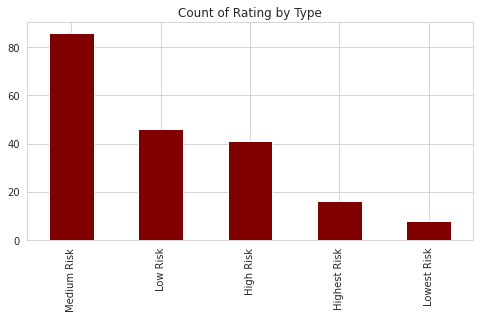

In [ ]:
sns.set_style('whitegrid')
ax = df['rating'].value_counts().plot(kind='bar',figsize=(8,4),title="Count of Rating by Type",color ='maroon')

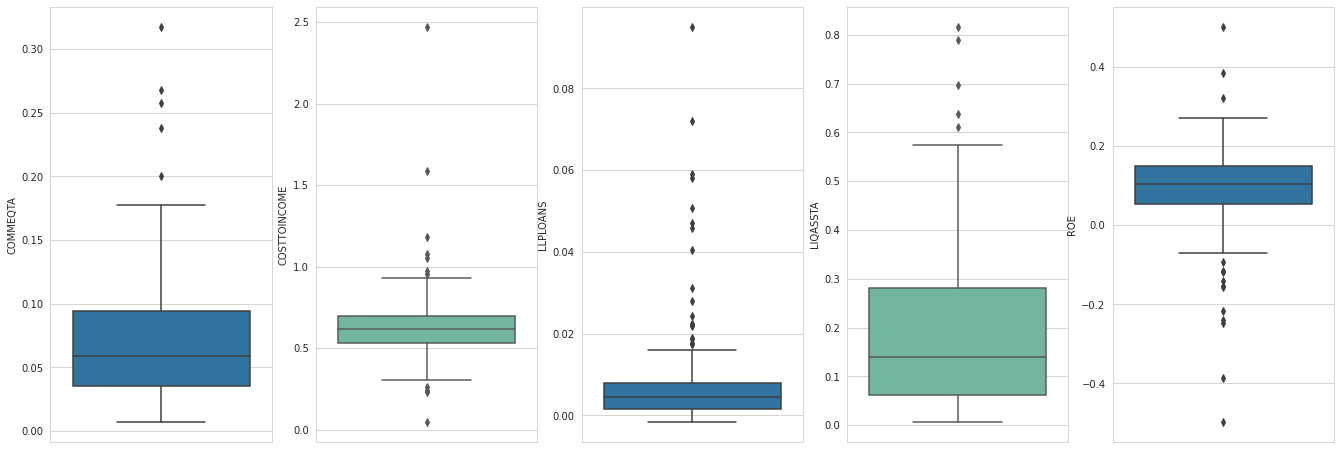

In [ ]:
plt.figure(figsize=(23,8))
plt.figure(1)
plt.subplot(151)
sns.boxplot(y ='COMMEQTA',data = data)
#ax = sns.swarmplot( y="COMMEQTA", data=data, color=".25")
plt.subplot(152)
sns.boxplot(y ='COSTTOINCOME',data = data,palette = 'Set2')
#ax = sns.swarmplot( y="COSTTOINCOME", data=data, color=".25")
plt.subplot(153)
sns.boxplot(y ='LLPLOANS',data = data)
#ax = sns.swarmplot( y="LLPLOANS", data=data, color=".25")
plt.subplot(154)
sns.boxplot(y ='LIQASSTA',data = data,palette = 'Set2')
plt.subplot(155)
sns.boxplot(y ='ROE',data = data)
plt.show()

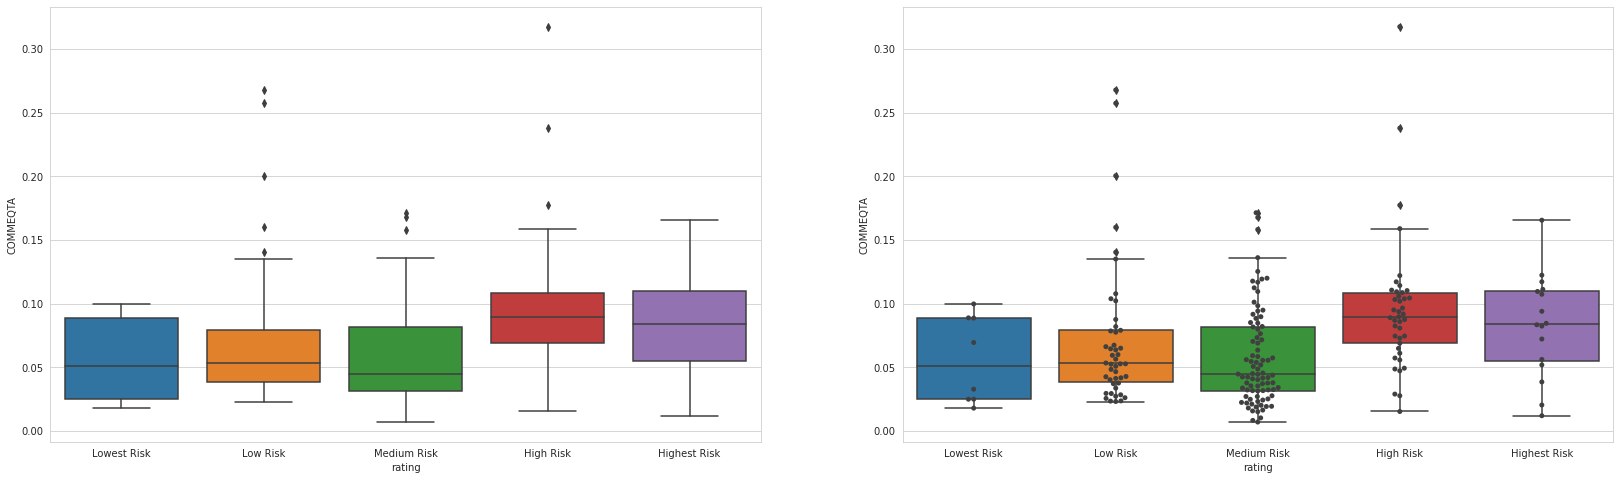

In [ ]:
plt.figure(figsize=(28,8))
plt.subplot(121)
sns.boxplot(x="rating",y ='COMMEQTA',data = data)
plt.subplot(122)
ax = sns.boxplot(x="rating", y="COMMEQTA", data=data)
ax = sns.swarmplot(x="rating", y="COMMEQTA", data=data, color=".25")
plt.show()

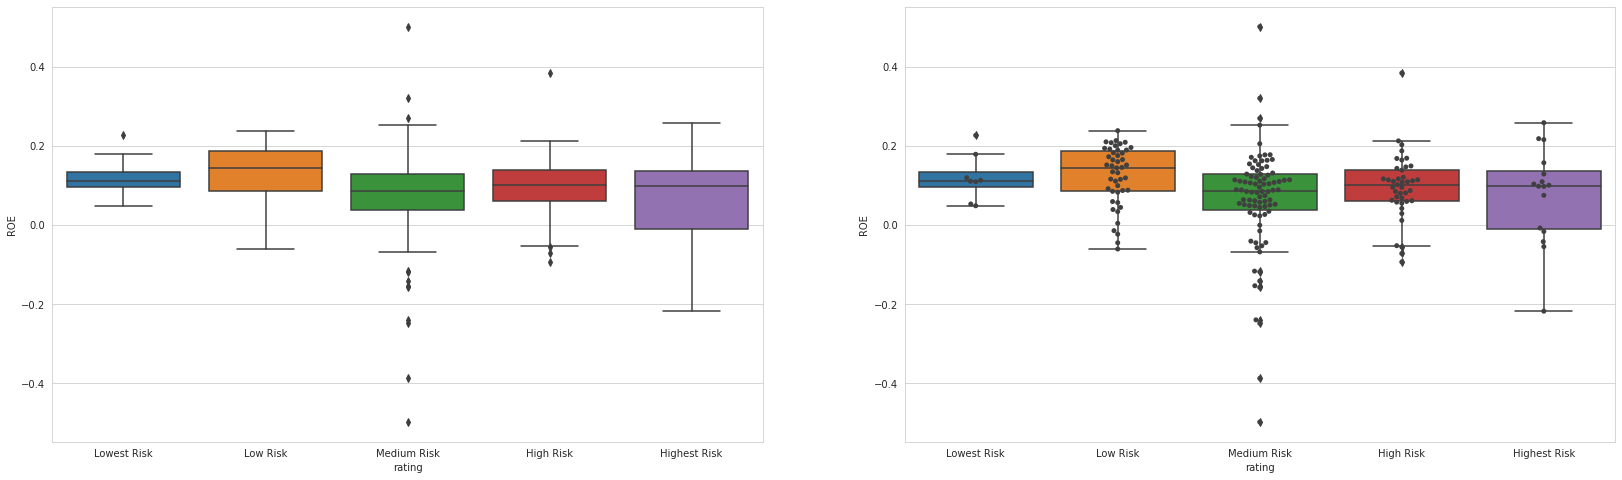

In [ ]:
plt.figure(figsize=(28,8))
plt.subplot(121)
sns.boxplot(x="rating",y ='ROE',data = data)
plt.subplot(122)
ax = sns.boxplot(x="rating", y="ROE", data=data)
ax = sns.swarmplot(x="rating", y="ROE", data=data, color=".25")
plt.show()

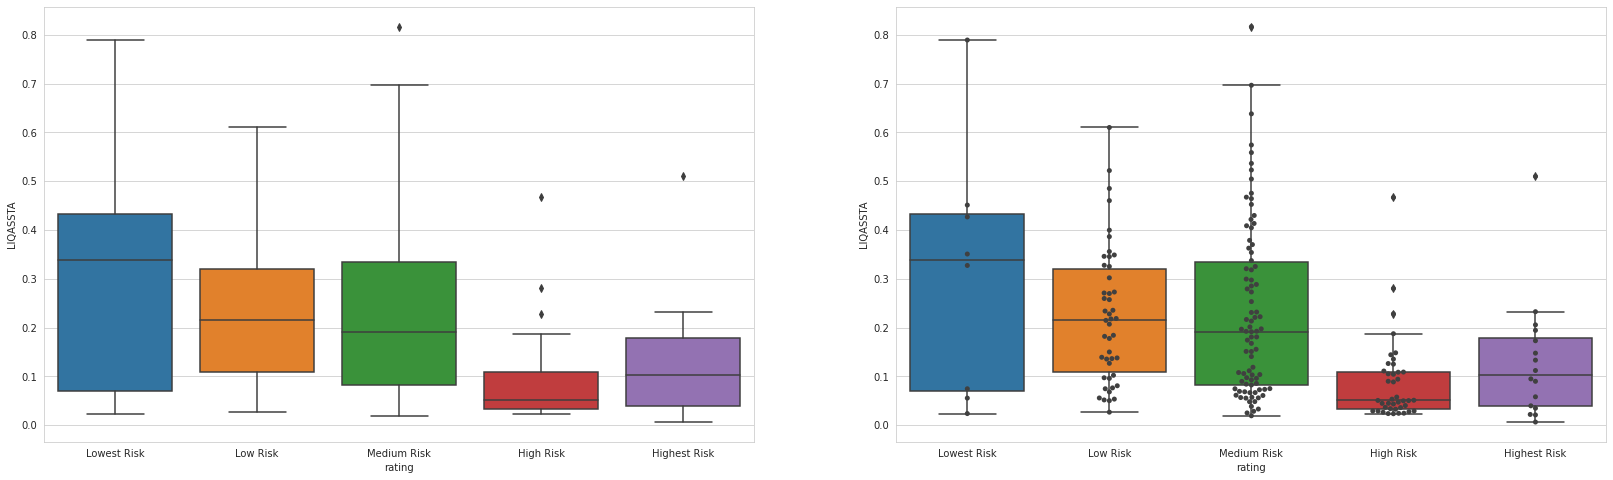

In [ ]:
plt.figure(figsize=(28,8))
plt.subplot(121)
sns.boxplot(x="rating",y ='LIQASSTA',data = data)
plt.subplot(122)
ax = sns.boxplot(x="rating", y="LIQASSTA", data=data)
ax = sns.swarmplot(x="rating", y="LIQASSTA", data=data, color=".25")
plt.show()

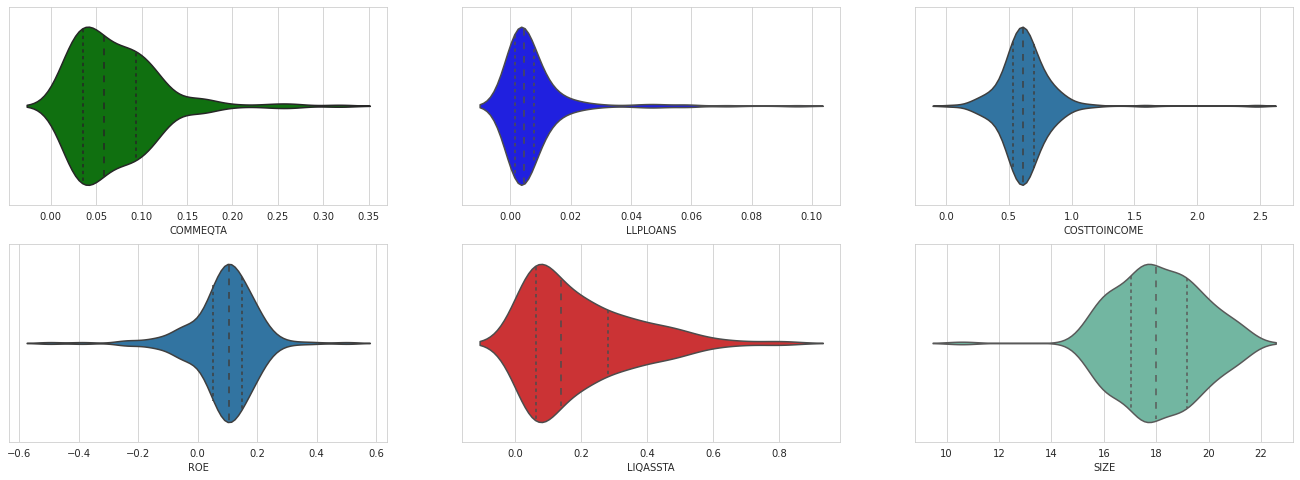

In [ ]:
plt.figure(figsize=(23,8))
plt.figure(1)
plt.subplot(231)
ax=sns.violinplot(x=data['COMMEQTA'],inner='quartile',color = 'g')
plt.subplot(232)
ax=sns.violinplot(x=data['LLPLOANS'],inner='quartile',color ='b')
plt.subplot(233)
ax=sns.violinplot(x=data['COSTTOINCOME'],inner='quartile')
plt.subplot(234)
ax=sns.violinplot(x=data['ROE'],inner='quartile')
plt.subplot(235)
ax=sns.violinplot(x=data['LIQASSTA'],inner='quartile', palette='Set1')
plt.subplot(236)
ax=sns.violinplot(x=data['SIZE'],inner='quartile',palette='Set2')
plt.show()

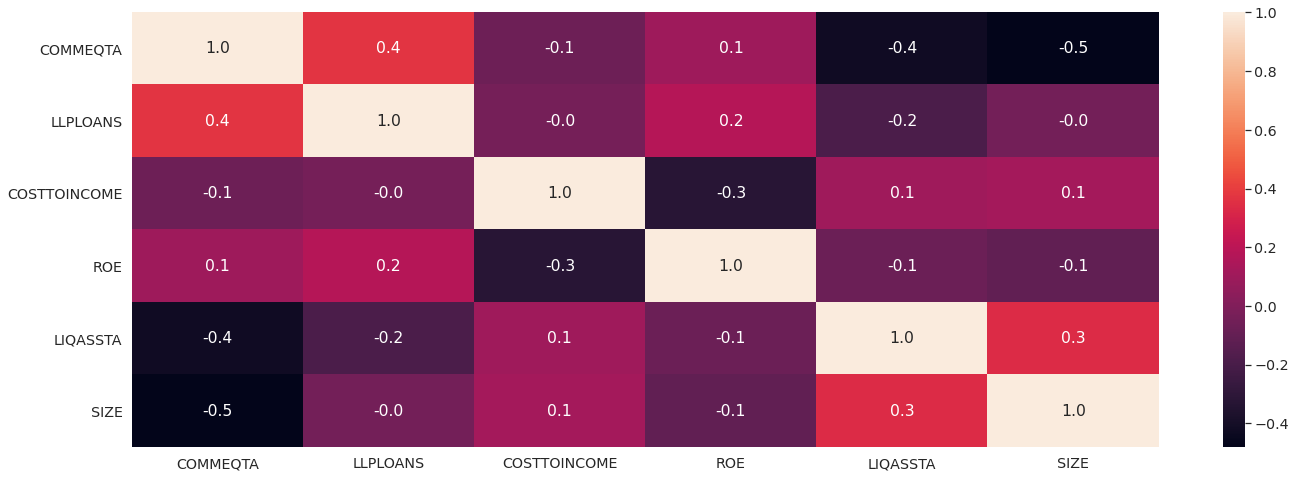

In [ ]:
plt.figure(figsize=(23,8))
sns.set()
sns.set(font_scale=1.3)
sns.heatmap(data[data.columns[:]].corr(),annot=True,fmt=".1f")
plt.show()

In [ ]:
pip install ppscore

     |████████████████████████████████| 47 kB 2.0 MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13067 sha256=b7484bb535892382f957f59314dca3337d84c13ccb2f138a5ebf76756f2f5b12
  Stored in directory: /root/.cache/pip/wheels/d2/3c/58/2ff786414b21713edc6f4fdb54fdee89ac37bca5edd1f60634
Successfully built ppscore


In [ ]:
data.columns

Index(['rating', 'COMMEQTA', 'LLPLOANS', 'COSTTOINCOME', 'ROE', 'LIQASSTA',
       'SIZE'],
      dtype='object')

In [ ]:
import ppscore as pps
pps.score(data, "COMMEQTA", "LLPLOANS")

{'baseline_score': 0.0058270253807106605,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'model_score': 0.008266249489795919,
 'ppscore': 0,
 'x': 'COMMEQTA',
 'y': 'LLPLOANS'}

In [ ]:
pps.matrix(data)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,rating,rating,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,rating,COMMEQTA,0.031121,regression,True,mean absolute error,0.034952,0.033864,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
2,rating,LLPLOANS,0.000000,regression,True,mean absolute error,0.005827,0.007051,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
3,rating,COSTTOINCOME,0.000000,regression,True,mean absolute error,0.130789,0.134742,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
4,rating,ROE,0.000000,regression,True,mean absolute error,0.073727,0.075118,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
5,rating,LIQASSTA,0.043489,regression,True,mean absolute error,0.125466,0.120009,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
6,rating,SIZE,0.162042,regression,True,mean absolute error,1.300189,1.089505,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
7,COMMEQTA,rating,0.105826,classification,True,weighted F1,0.299492,0.373624,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
8,COMMEQTA,COMMEQTA,1.000000,predict_itself,True,None,0.000000,1.000000,None
9,COMMEQTA,LLPLOANS,0.000000,regression,True,mean absolute error,0.005827,0.008266,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


# Modelling -

In [ ]:
from numpy import loadtxt
from numpy import sort
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from wordcloud import WordCloud, STOPWORDS 
from random import sample
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [ ]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df.rating)
df.rating = le.transform(df.rating) # encode rating

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state = 123)

In [ ]:
X_train, y_train = df_train.iloc[:,1:7], df_train.iloc[:,0]
X_test, y_test = df_test.iloc[:,1:7], df_test.iloc[:,0]

In [ ]:
X_train

,COMMEQTA,LLPLOANS,COSTTOINCOME,ROE,LIQASSTA,SIZE
180,0.029034,0.001059,0.568210,0.120590,0.280219,18.1569
33,0.031747,0.012209,0.235535,-0.067790,0.464299,15.7542
23,0.026187,0.005720,0.682977,0.091863,0.610125,21.0835
88,0.020451,0.001213,0.484540,0.098090,0.509820,17.1623
41,0.055558,0.005685,0.561147,0.154577,0.167737,19.3039
...,...,...,...,...,...,...
17,0.028459,0.018826,0.511103,0.119113,0.302016,21.1939
98,0.025000,0.004340,0.645317,0.119583,0.426792,21.2641
66,0.110669,0.024377,0.857765,-0.071785,0.027588,17.5691
126,0.102287,0.005624,0.527537,0.132183,0.026757,18.3536


# XGBoost MODEL

In [ ]:
XGB_model = xgb.XGBRegressor(objective ='multi:softmax', num_class =6)
XGB_model.fit(X_train, y_train)
y_pred_XGB = XGB_model.predict(X_test)
Accuracy_XGB = metrics.accuracy_score(y_test, y_pred_XGB)
print("XGB Accuracy:",Accuracy_XGB)

XGB Accuracy: 0.45


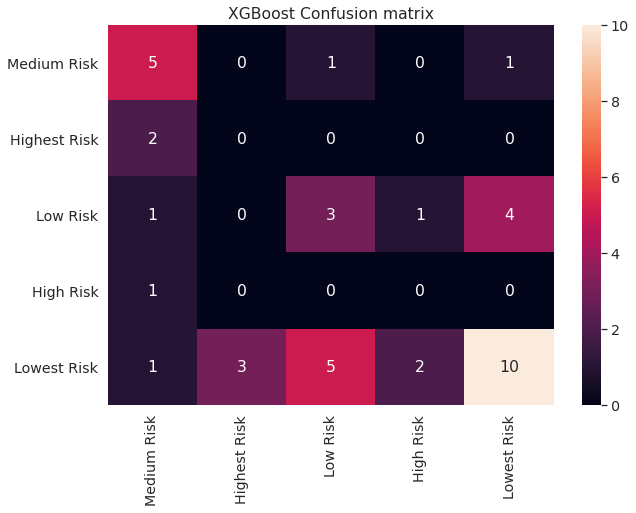

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_XGB), index = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']],
                  columns = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']])
plt.figure(figsize = (10,7))
plt.title("XGBoost Confusion matrix")
sns.heatmap(df_cm, annot=True);

In [ ]:
print(classification_report(y_test, y_pred_XGB, target_names = ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']))

              precision    recall  f1-score   support

 Medium Risk       0.50      0.71      0.59         7
Highest Risk       0.00      0.00      0.00         2
    Low Risk       0.33      0.33      0.33         9
   High Risk       0.00      0.00      0.00         1
 Lowest Risk       0.67      0.48      0.56        21

    accuracy                           0.45        40
   macro avg       0.30      0.30      0.30        40
weighted avg       0.51      0.45      0.47        40



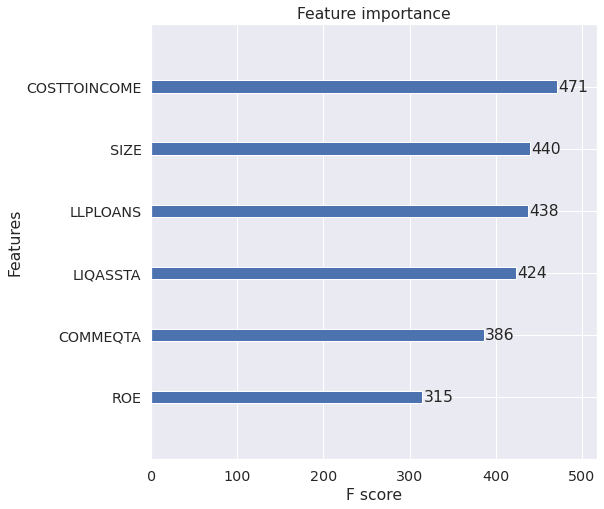

In [ ]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(8, 8))

plot_importance(XGB_model, ax=ax)
plt.show()

# Gradient Boosting Classifier Model

In [ ]:
GBT_model = GradientBoostingClassifier(random_state=123)
GBT_model.fit(X_train, y_train)
y_pred_GBT = GBT_model.predict(X_test)
Accuracy_GBT = metrics.accuracy_score(y_test, y_pred_GBT)
print("GBT Accuracy:",Accuracy_GBT)

GBT Accuracy: 0.575


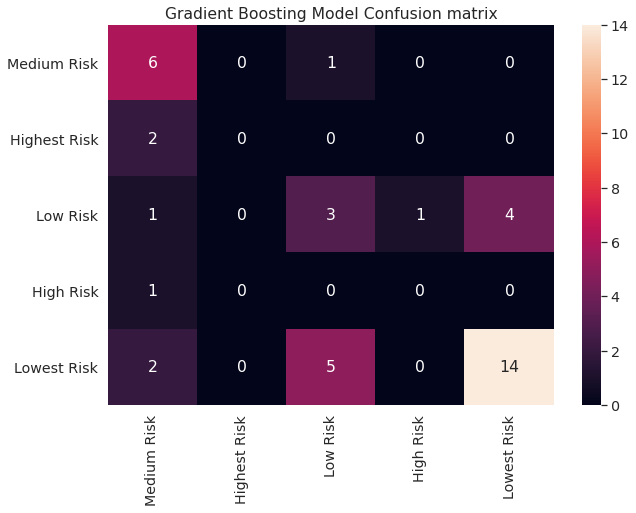

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_GBT), index = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']],
                  columns = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']])
plt.figure(figsize = (10,7))
plt.title("Gradient Boosting Model Confusion matrix")
sns.heatmap(df_cm, annot=True);

In [ ]:
print(classification_report(y_test, y_pred_GBT, target_names = ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']))

              precision    recall  f1-score   support

 Medium Risk       0.50      0.86      0.63         7
Highest Risk       0.00      0.00      0.00         2
    Low Risk       0.33      0.33      0.33         9
   High Risk       0.00      0.00      0.00         1
 Lowest Risk       0.78      0.67      0.72        21

    accuracy                           0.57        40
   macro avg       0.32      0.37      0.34        40
weighted avg       0.57      0.57      0.56        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Model

In [ ]:
RF_model = RandomForestClassifier(random_state=1234)
RF_model.fit(X_train,y_train)
y_pred_RF = RF_model.predict(X_test)
Accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.675


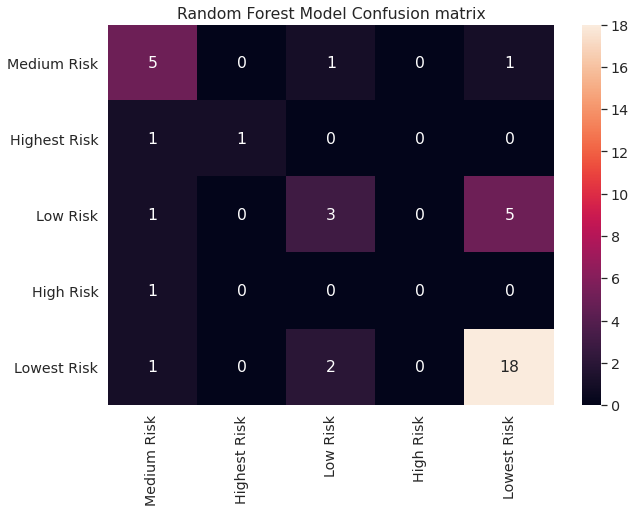

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF), index = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']],
                  columns = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']])
plt.figure(figsize = (10,7))
plt.title("Random Forest Model Confusion matrix")
sns.heatmap(df_cm, annot=True);

In [ ]:
print(classification_report(y_test, y_pred_RF, target_names = ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']))

              precision    recall  f1-score   support

 Medium Risk       0.56      0.71      0.63         7
Highest Risk       1.00      0.50      0.67         2
    Low Risk       0.50      0.33      0.40         9
   High Risk       0.00      0.00      0.00         1
 Lowest Risk       0.75      0.86      0.80        21

    accuracy                           0.68        40
   macro avg       0.56      0.48      0.50        40
weighted avg       0.65      0.68      0.65        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support Vector Machine Model

In [ ]:
SVC_model = svm.SVC(kernel='rbf', gamma= 1, C = 1, random_state=1234)
SVC_model.fit(X_train, y_train)
y_pred_SVM = SVC_model.predict(X_test)
Accuracy_SVM = metrics.accuracy_score(y_test, y_pred_SVM)
print("SVM Accuracy:",Accuracy_SVM)

SVM Accuracy: 0.575


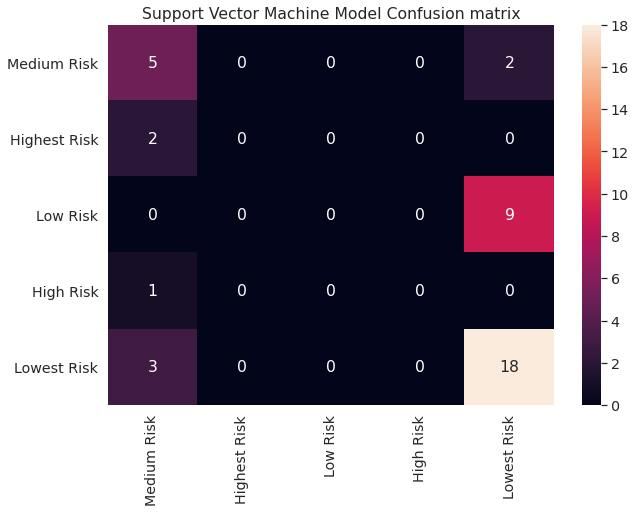

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_SVM), index = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']],
                  columns = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']])
plt.figure(figsize = (10,7))
plt.title("Support Vector Machine Model Confusion matrix")
sns.heatmap(df_cm, annot=True);

In [ ]:
print(classification_report(y_test, y_pred_SVM, target_names = ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']))

              precision    recall  f1-score   support

 Medium Risk       0.45      0.71      0.56         7
Highest Risk       0.00      0.00      0.00         2
    Low Risk       0.00      0.00      0.00         9
   High Risk       0.00      0.00      0.00         1
 Lowest Risk       0.62      0.86      0.72        21

    accuracy                           0.57        40
   macro avg       0.22      0.31      0.26        40
weighted avg       0.41      0.57      0.48        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Neural Network Model

In [ ]:
MLP_model = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='tanh', solver='adam', max_iter=1500)
MLP_model.fit(X_train, y_train)
y_pred_MLP = MLP_model.predict(X_test)
Accuracy_MLP = metrics.accuracy_score(y_test, y_pred_MLP)
print("MLP Accuracy:",Accuracy_MLP)

MLP Accuracy: 0.6


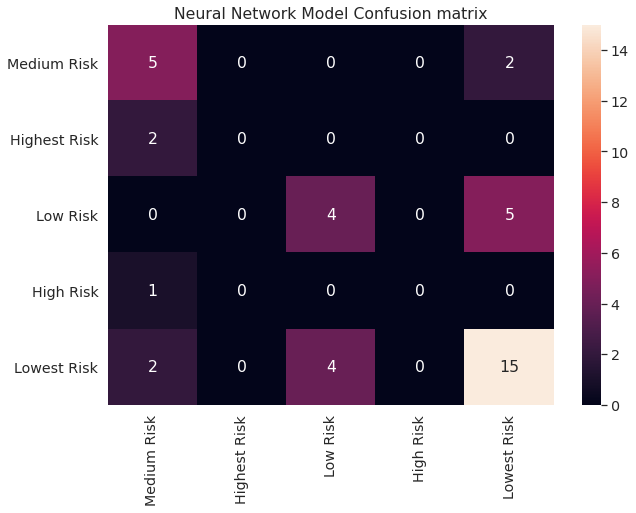

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_MLP), index = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']],
                  columns = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']])
plt.figure(figsize = (10,7))
plt.title("Neural Network Model Confusion matrix")
sns.heatmap(df_cm, annot=True);

In [ ]:
print(classification_report(y_test, y_pred_MLP, target_names = ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']))

              precision    recall  f1-score   support

 Medium Risk       0.50      0.71      0.59         7
Highest Risk       0.00      0.00      0.00         2
    Low Risk       0.50      0.44      0.47         9
   High Risk       0.00      0.00      0.00         1
 Lowest Risk       0.68      0.71      0.70        21

    accuracy                           0.60        40
   macro avg       0.34      0.37      0.35        40
weighted avg       0.56      0.60      0.58        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Naive Bayes MODEL

In [ ]:
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)
y_pred_GNB = GNB_model.predict(X_test)
Accuracy_GNB = metrics.accuracy_score(y_test, y_pred_GNB)
print("GNB Accuracy:",Accuracy_GNB)

GNB Accuracy: 0.425


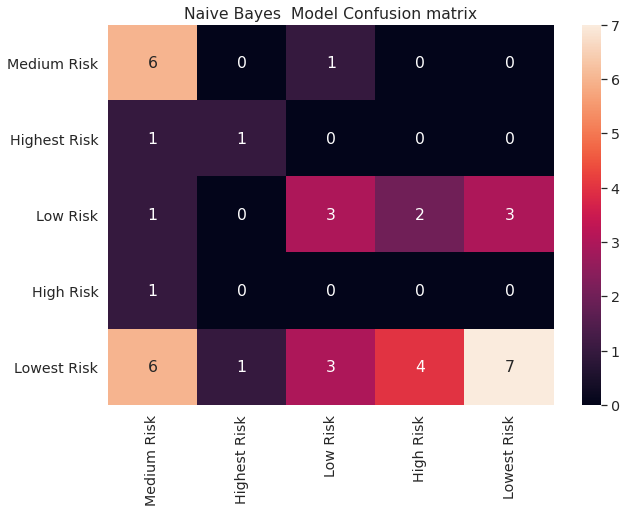

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_GNB), index = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']],
                  columns = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']])
plt.figure(figsize = (10,7))
plt.title("Naive Bayes  Model Confusion matrix")
sns.heatmap(df_cm, annot=True);

In [ ]:
print(classification_report(y_test, y_pred_GNB, target_names = ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']))

              precision    recall  f1-score   support

 Medium Risk       0.40      0.86      0.55         7
Highest Risk       0.50      0.50      0.50         2
    Low Risk       0.43      0.33      0.38         9
   High Risk       0.00      0.00      0.00         1
 Lowest Risk       0.70      0.33      0.45        21

    accuracy                           0.42        40
   macro avg       0.41      0.40      0.37        40
weighted avg       0.56      0.42      0.44        40



#K Nearest Neighbor Model

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors = 7)
KNN_model.fit(X_train,y_train)
y_pred_KNN = KNN_model.predict(X_test)
Accuracy_KNN = metrics.accuracy_score(y_test, y_pred_KNN)
print("KNN Accuracy:",Accuracy_KNN)

KNN Accuracy: 0.525


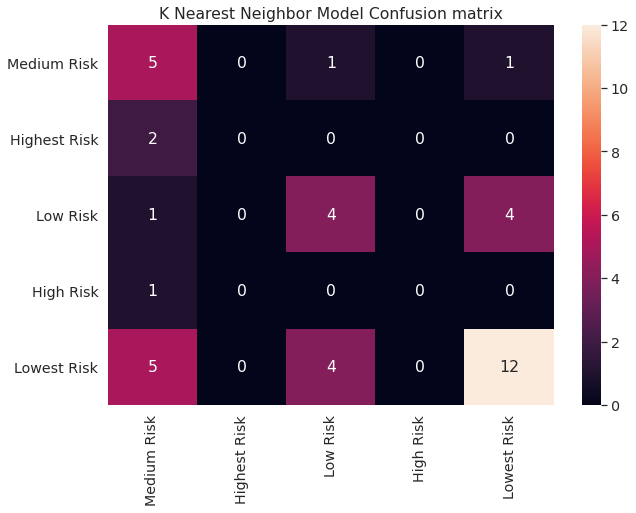

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_KNN), index = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']],
                  columns = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']])
plt.figure(figsize = (10,7))
plt.title("K Nearest Neighbor Model Confusion matrix")
sns.heatmap(df_cm, annot=True);

In [ ]:
print(classification_report(y_test, y_pred_KNN, target_names = ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']))

              precision    recall  f1-score   support

 Medium Risk       0.36      0.71      0.48         7
Highest Risk       0.00      0.00      0.00         2
    Low Risk       0.44      0.44      0.44         9
   High Risk       0.00      0.00      0.00         1
 Lowest Risk       0.71      0.57      0.63        21

    accuracy                           0.53        40
   macro avg       0.30      0.35      0.31        40
weighted avg       0.53      0.53      0.51        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression Model

In [ ]:
LR_model = LogisticRegression(random_state=1234 , multi_class='multinomial', solver='newton-cg')
LR_model = LR_model.fit(X_train, y_train)
y_pred_LR = LR_model.predict(X_test)
Accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
print("LR Accuracy:",Accuracy_LR)

LR Accuracy: 0.6


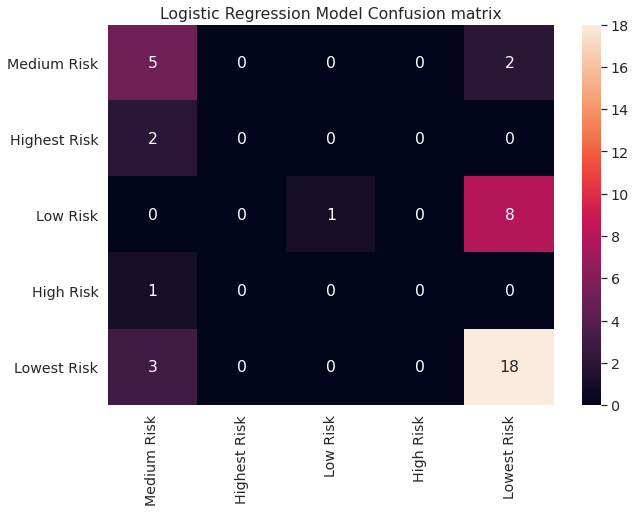

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_LR), index = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']],
                  columns = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']])
plt.figure(figsize = (10,7))
plt.title("Logistic Regression Model Confusion matrix")
sns.heatmap(df_cm, annot=True);

In [ ]:
print(classification_report(y_test, y_pred_LR, target_names = ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']))

              precision    recall  f1-score   support

 Medium Risk       0.45      0.71      0.56         7
Highest Risk       0.00      0.00      0.00         2
    Low Risk       1.00      0.11      0.20         9
   High Risk       0.00      0.00      0.00         1
 Lowest Risk       0.64      0.86      0.73        21

    accuracy                           0.60        40
   macro avg       0.42      0.34      0.30        40
weighted avg       0.64      0.60      0.53        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Linear Discriminant Analysis Model

In [ ]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)
y_pred_LDA = LDA_model.predict(X_test)
Accuracy_LDA = metrics.accuracy_score(y_test, y_pred_LDA)
print("LDA Accuracy:",Accuracy_LDA)

LDA Accuracy: 0.625


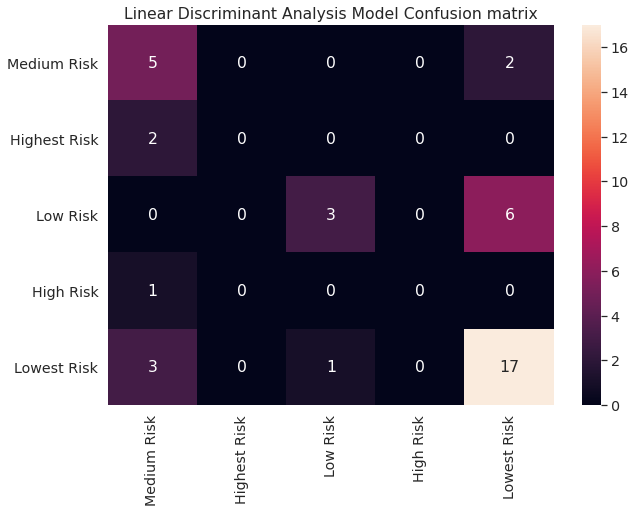

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_LDA), index = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']],
                  columns = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']])
plt.figure(figsize = (10,7))
plt.title("Linear Discriminant Analysis Model Confusion matrix")
sns.heatmap(df_cm, annot=True);

In [ ]:
print(classification_report(y_test, y_pred_LDA, target_names = ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']))

              precision    recall  f1-score   support

 Medium Risk       0.45      0.71      0.56         7
Highest Risk       0.00      0.00      0.00         2
    Low Risk       0.75      0.33      0.46         9
   High Risk       0.00      0.00      0.00         1
 Lowest Risk       0.68      0.81      0.74        21

    accuracy                           0.62        40
   macro avg       0.38      0.37      0.35        40
weighted avg       0.61      0.62      0.59        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Quadratic Discriminant Analysis

In [ ]:
QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(X_train,y_train)
y_pred_QDA = QDA_model.predict(X_test)
Accuracy_QDA = metrics.accuracy_score(y_test, y_pred_QDA)
print("QDA Accuracy:",Accuracy_QDA)

QDA Accuracy: 0.475


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


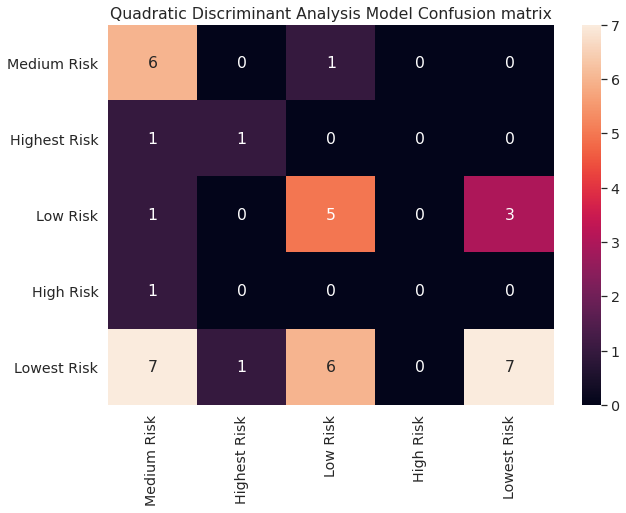

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_QDA), index = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']],
                  columns = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']])
plt.figure(figsize = (10,7))
plt.title("Quadratic Discriminant Analysis Model Confusion matrix")
sns.heatmap(df_cm, annot=True);

In [ ]:
print(classification_report(y_test, y_pred_QDA, target_names = ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']))

              precision    recall  f1-score   support

 Medium Risk       0.38      0.86      0.52         7
Highest Risk       0.50      0.50      0.50         2
    Low Risk       0.42      0.56      0.48         9
   High Risk       0.00      0.00      0.00         1
 Lowest Risk       0.70      0.33      0.45        21

    accuracy                           0.48        40
   macro avg       0.40      0.45      0.39        40
weighted avg       0.55      0.47      0.46        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_CLF = clf.predict(X_test)

Accuracy_CLF = metrics.accuracy_score(y_test, y_pred_CLF)
print("CLF Accuracy:",Accuracy_CLF)

CLF Accuracy: 0.6


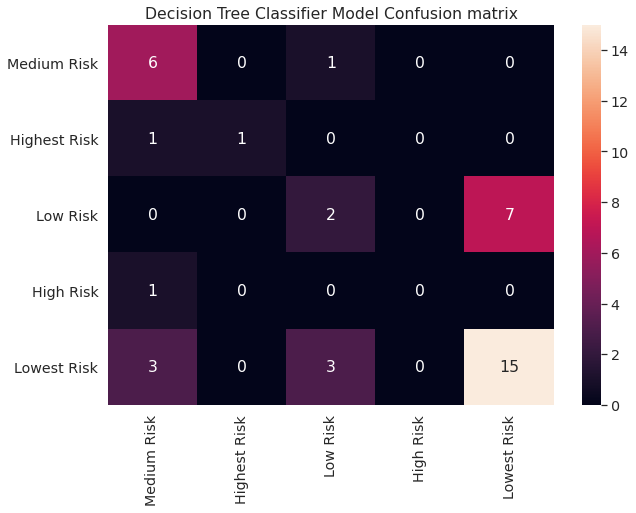

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_CLF), index = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']],
                  columns = [i for i in ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']])
plt.figure(figsize = (10,7))
plt.title("Decision Tree Classifier Model Confusion matrix")
sns.heatmap(df_cm, annot=True);

In [ ]:
print(classification_report(y_test, y_pred_CLF, target_names = ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk','Lowest Risk']))

              precision    recall  f1-score   support

 Medium Risk       0.55      0.86      0.67         7
Highest Risk       1.00      0.50      0.67         2
    Low Risk       0.33      0.22      0.27         9
   High Risk       0.00      0.00      0.00         1
 Lowest Risk       0.68      0.71      0.70        21

    accuracy                           0.60        40
   macro avg       0.51      0.46      0.46        40
weighted avg       0.58      0.60      0.58        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Accuracy Analaysis

In [ ]:
accuracy_list = [Accuracy_XGB, Accuracy_GBT, Accuracy_RF, Accuracy_SVM, Accuracy_MLP, Accuracy_GNB, 
                 Accuracy_LDA, Accuracy_QDA, Accuracy_KNN, Accuracy_LR,Accuracy_CLF]

model_list = ['XGBboost', 'Gradient Boosting', 'Random Forest', 'Support Vector Machine', 
              "Neural Network", 'Naive Bayes', 'Linear Discriminat', 'Quadratic Discriminat','KNN', 'Logistic Regression',
              'Decision Tree Classifier']

df_accuracy = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list})

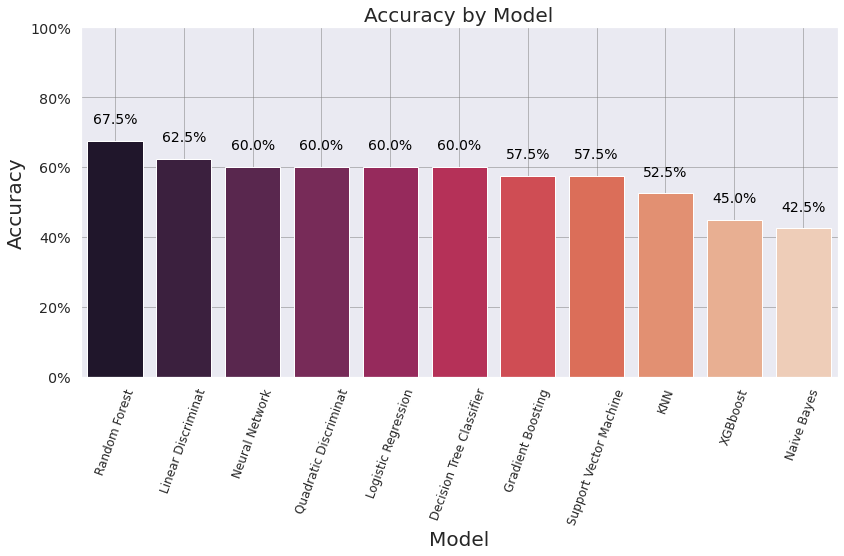

In [ ]:
order = list(df_accuracy.sort_values('Accuracy', ascending=False).Model)
df_accuracy = df_accuracy.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)
 
plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Accuracy", data=df_accuracy, order = order, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy by Model", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
 
for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy.loc[i, 'Accuracy'])*100, 2))+'%', 
             fontsize = 14, color='black',horizontalalignment='center')
 
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)
 
plt.tight_layout()